In [2]:
##########################################################################
#
# 'kmeans', 'pam' ('Partitioning Around Medoids') y 'clara' (CLustering 
# LARge Applications) son algoritmos de clustering que definen particiones
# sobre un número predefinido 'k' de clases.
#
##########################################################################
#
# Introducción de los datos: 'iris'
#
?iris
#
# Para una clasificación no supervisada no se toma en cuenta
# la variable 'Species' de la planta (5a. columna)
#
datos0 <- iris[,1:4]
#
# Características generales del conjunto de datos
#
dim(datos0); nrow(datos0); ncol(datos0)
#
head.matrix(datos0)
#
summary(datos0)

[1] 150   4

[1] 150

[1] 4

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

In [3]:
# Preprocesamiento
#
# ¿Estandarizar las variables?
#    Son homogéneas (cm.); es razonable tratarlas tal cual.
#    Sin embargo, algunas medidas son más grandes ('*.Length') que otras, 
#    y tratarlas tal cual equivaldría, en cierto sentido,
#    a analizarlas por su apariencia visual.
#
#    Estandarizar las variables equivale, en principio, a
#    poner todas las variables a un mismo nivel en el análisis.
#    Esta es la opción que se hace en el siguiente análisis
#
# Para estandarizar las variables (media 0, varianza 1)
#
datos <- scale(datos0)
#
# si no fueran estandarizadas:
#
#                  datos <- datos0
#
# Verificación:
#
for(j in 1:ncol(datos)) print(c(mean(datos[,j]), var(datos[,j])))
#
# En lenguaje R es más propio verificarlo así, sin bucles explícitos:
#
apply(datos,2,mean); apply(datos,2,var)

[1] -4.484318e-16  1.000000e+00
[1] 2.034094e-16 1.000000e+00
[1] -2.895326e-17  1.000000e+00
[1] -3.663049e-17  1.000000e+00


Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-4.484318e-16  2.034094e-16 -2.895326e-17 -3.663049e-17

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

In [20]:
set.seed(2011)
#
# 'k' arbitrario. Inicio de la exploración.
#
k <- 3
#
km <- kmeans(datos, k)
#
km

K-means clustering with 3 clusters of sizes 21, 33, 96

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1   -1.3232208  -0.3718921   -1.1334386  -1.1111395
2   -0.8135055   1.3145538   -1.2825372  -1.2156393
3    0.5690971  -0.3705265    0.6888118   0.6609378

Clustering vector:
  [1] 2 1 1 1 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2
 [38] 2 1 2 2 1 1 2 2 1 2 1 2 2 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

Within cluster sum of squares by cluster:
[1]  23.15862  17.33362 149.25899
 (between_SS / total_SS =  68.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [21]:
class(km)
mode(km)
attributes(km)
str(km)

[1] "kmeans"

[1] "list"

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

List of 9
 $ cluster     : int [1:150] 2 1 1 1 2 2 2 2 1 1 ...
 $ centers     : num [1:3, 1:4] -1.323 -0.814 0.569 -0.372 1.315 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 596
 $ withinss    : num [1:3] 23.2 17.3 149.3
 $ tot.withinss: num 190
 $ betweenss   : num 406
 $ size        : int [1:3] 21 33 96
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [22]:
km$cluster

[1] 2 1 1 1 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2
 [38] 2 1 2 2 1 1 2 2 1 2 1 2 2 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

In [23]:
km$size


[1] 21 33 96

In [24]:
compocl <- vector("list", k)
for(kcl in 1:k) compocl[[kcl]] <- which(km$cluster == kcl)
compocl

[[1]]
 [1]  2  3  4  9 10 13 14 26 30 31 35 36 39 42 43 46 48 58 61 94 99

[[2]]
 [1]  1  5  6  7  8 11 12 15 16 17 18 19 20 21 22 23 24 25 27 28 29 32 33 34 37
[26] 38 40 41 44 45 47 49 50

[[3]]
 [1]  51  52  53  54  55  56  57  59  60  62  63  64  65  66  67  68  69  70  71
[20]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
[39]  91  92  93  95  96  97  98 100 101 102 103 104 105 106 107 108 109 110 111
[58] 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
[77] 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
[96] 150

In [25]:
km$totss == km$tot.withinss + km$betweenss


[1] TRUE

In [26]:
IB <- km$betweenss/km$totss # IB <- 1-km$tot.withinss/km$totss
IB

[1] 0.6816254

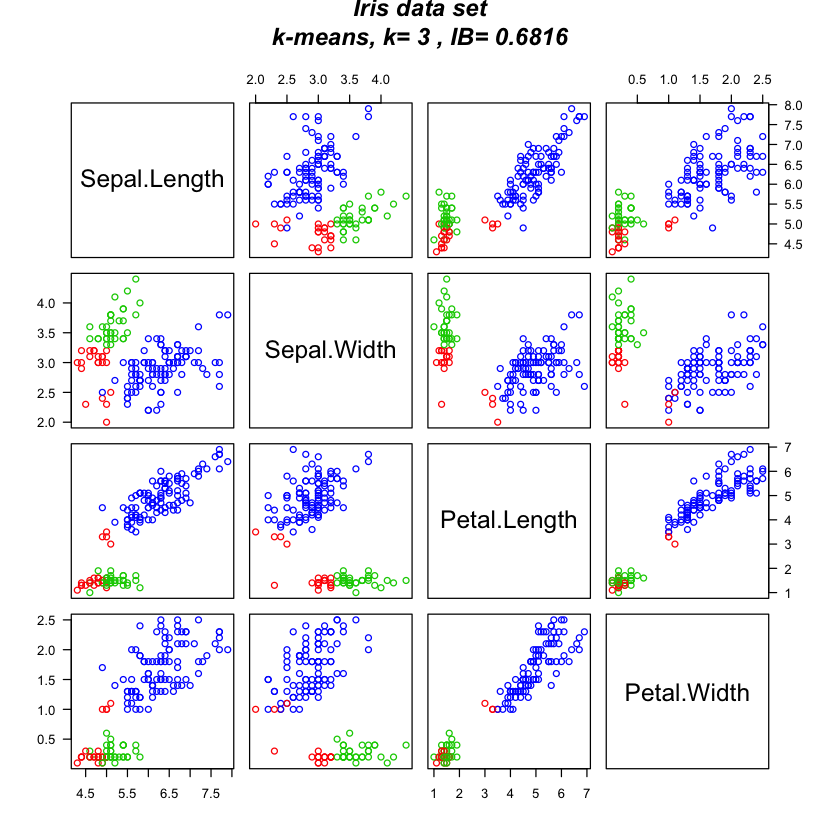

In [27]:
pairs(datos0, col=km$cluster+1, las=1,
      main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
      font.main=4)

In [28]:
sortdatos <- sort(km$cluster, index.return=TRUE)$ix
datosort <- datos[sortdatos, ]
#
#   Distancia euclidiana:
#
distancias <- dist(datosort, method="euclidean")

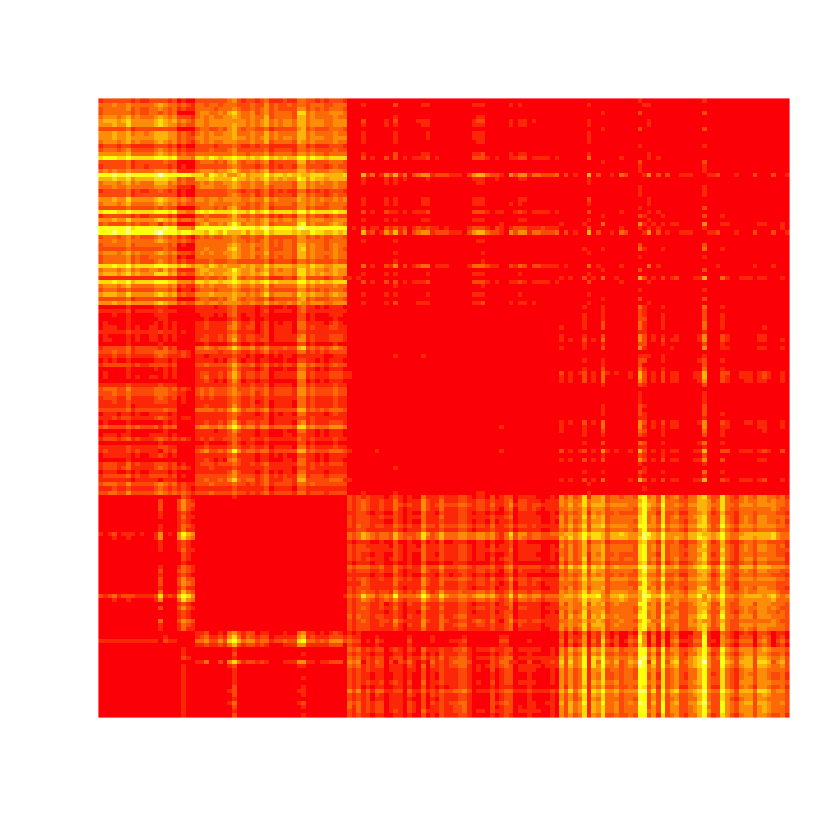

In [29]:
image(as.matrix(distancias^2), col=heat.colors(12), axes=FALSE)


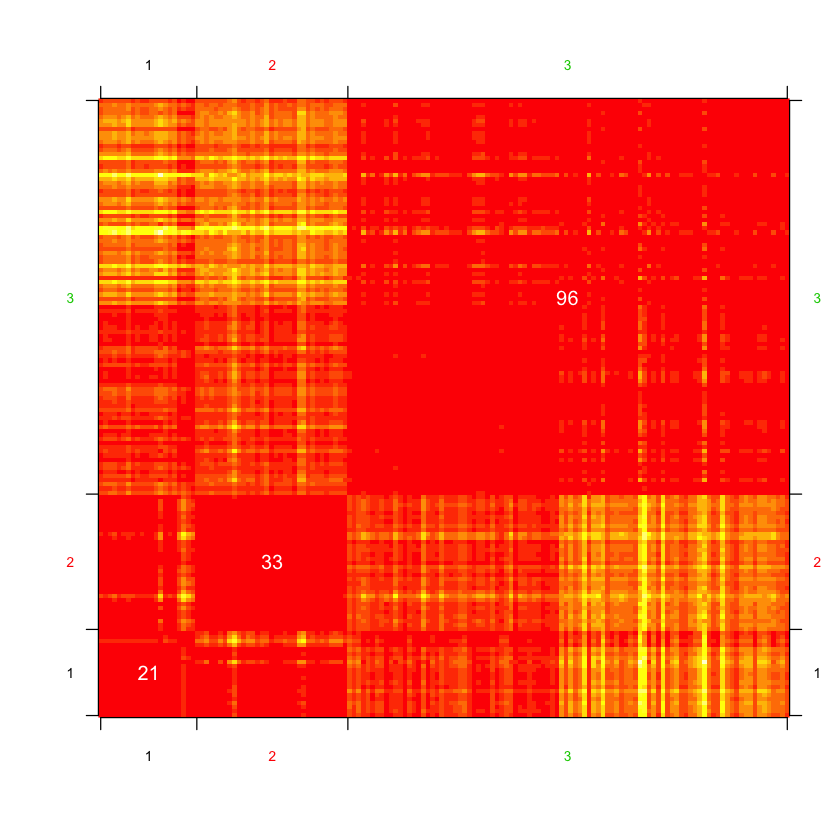

In [30]:
image(as.matrix(distancias^2), col=heat.colors(12), axes=FALSE)
#
#   Conviene completar la imagen para su mejor interpretación
#
#   Marcas de los bordes por clases
#
atpoints <- c(0,cumsum(km$size))/max(cumsum(km$size))
for(side in 1:4) axis(side, at=atpoints, col.axis="transparent")
atpoints2 <- c(atpoints[-1],0)
atpoints2 <- (atpoints+atpoints2)/2
atpoints2 <- atpoints2[-length(atpoints2)]
#
etclases <- sort(unique(km$cluster))
for(side in 1:4) 
 for(etcl in 1:length(etclases))
  axis(side, 
       at=atpoints2[etcl], labels=etclases[etcl], col.axis=etclases[etcl], 
       las=1, tick=FALSE, cex.axis=0.7)
#
#   Tamaño de las clases
#
text(atpoints2, atpoints2, km$size, col="white")
#

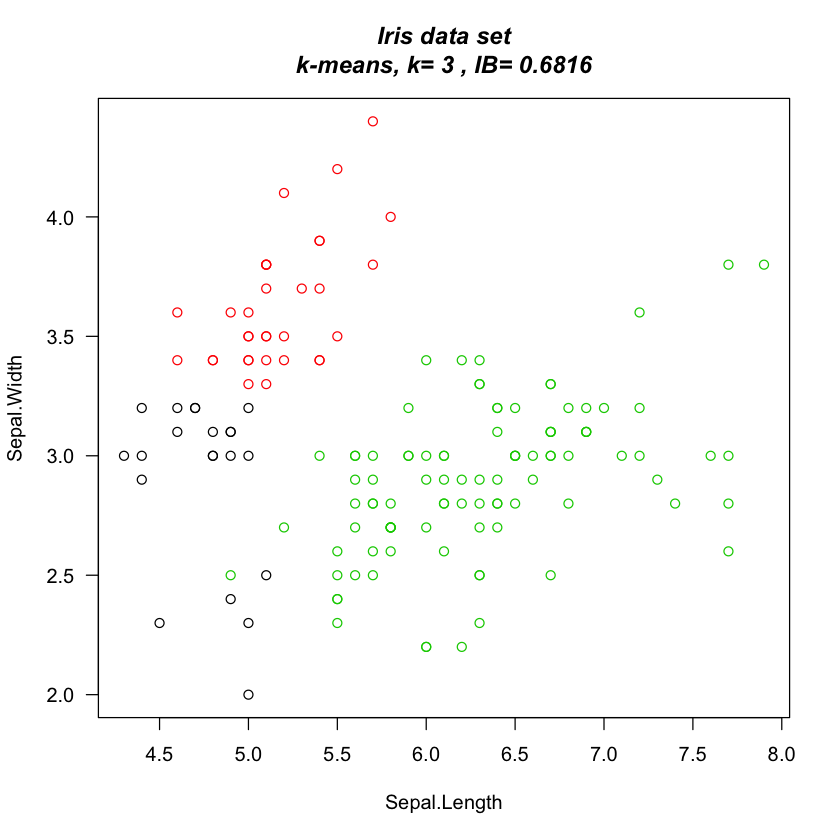

In [31]:
selec <- c(1,2) # cualquier par de variables
#
plot(datos0[,selec], col=km$cluster, las=1,
     main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
     font.main=4, xlab=names(datos0)[selec[1]], ylab=names(datos0)[selec[2]])
#
#                      Ubicación de los centros de clase
#

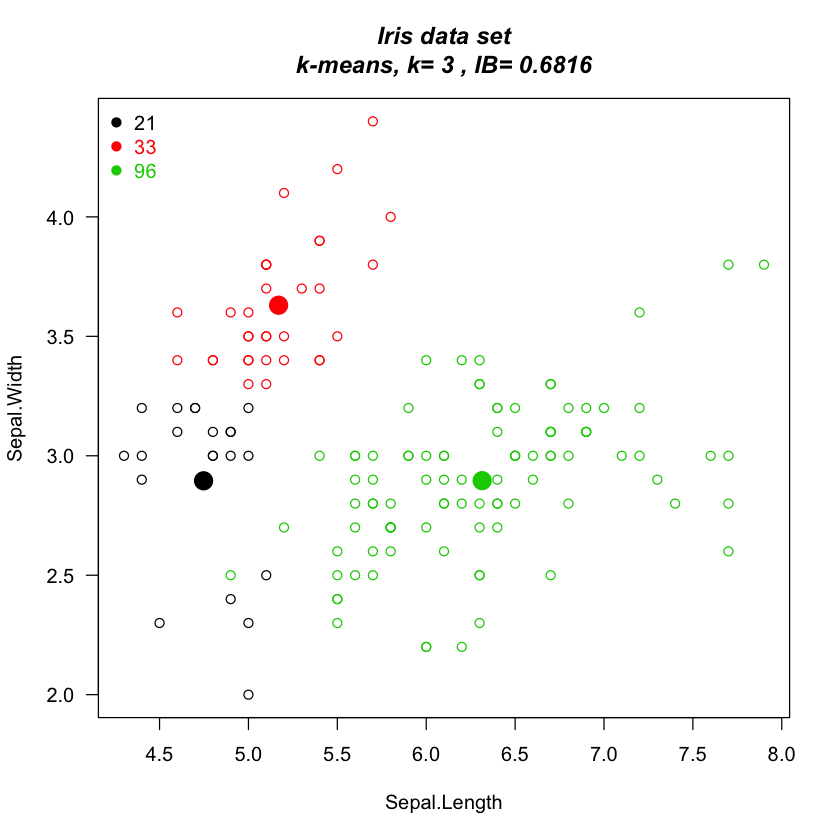

In [32]:
# 
# Contraste de la adecuación de las clases
#
selec <- c(1,2) # cualquier par de variables
#
plot(datos0[,selec], col=km$cluster, las=1,
     main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
     font.main=4, xlab=names(datos0)[selec[1]], ylab=names(datos0)[selec[2]])
#
#                      Ubicación de los centros de clase
#
kmcenters <- matrix(rep(0, k*ncol(datos0)), ncol=ncol(datos0))
for(j in 1:ncol(datos0))
      kmcenters[,j] <- tapply(datos0[,j], km$cluster, mean)
rownames(kmcenters) <- 1:k; colnames(kmcenters) <- colnames(kmcenters)
#
points(kmcenters[etclases,selec], 
       col=etclases, pch=19, cex=2)
#
legend("topleft", bty="n", 
       x.intersp=1, y.intersp=1,
       legend=km$size[etclases], text.col=etclases, 
       pch=19, col=etclases, ncol=1, cex=1)
#